In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
in_office_1 = pd.read_csv("usajobs_in_office_data_software.csv")
in_office_2 = pd.read_csv("usajobs_in_office_data_Operations Research Analysts.csv")
in_office_3 = pd.read_csv("usajobs_in_office_data_Management analysts.csv")
in_office_4 = pd.read_csv("usajobs_in_office_data_ITProject.csv")
in_office_5 = pd.read_csv("usajobs_in_office_data_dataanalyst.csv")
in_office_6 = pd.read_csv("usajobs_in_office_data_cybersecurity.csv")
#remote_wages = pd.read_csv("IT_Project_Manager_wages_remote.csv")

In [4]:
# Add Role column for each dataset
in_office_1['Role'] = 'Software'
in_office_2['Role'] = 'Operations Research Analyst'
in_office_3['Role'] = 'Management Analyst'
in_office_4['Role'] = 'IT Project'
in_office_5['Role'] = 'Data Analyst'
in_office_6['Role'] = 'Cybersecurity'

In [5]:
print(in_office_1.columns,in_office_2.columns,in_office_3.columns,in_office_4.columns,in_office_5.columns,in_office_6.columns)

Index(['Job Title', 'Location', 'Pay', 'Average Salary', 'Role'], dtype='object') Index(['Job Title', 'Location', 'Pay', 'Average Salary', 'Role'], dtype='object') Index(['Job Title', 'Location', 'Pay', 'Average Salary', 'Role'], dtype='object') Index(['Job Title', 'Location', 'Pay', 'Average Salary', 'Role'], dtype='object') Index(['Job Title', 'Location', 'Pay', 'Average Salary', 'Role'], dtype='object') Index(['Job Title', 'Location', 'Pay', 'Average Salary', 'Role'], dtype='object')


In [6]:
# Concatenate all the office wages datasets
in_office_wages = pd.concat([in_office_1,in_office_2,in_office_3,in_office_4,in_office_5,in_office_6]).reset_index(drop=True)

in_office_wages.head(10)

,Job Title,Location,Pay,Average Salary,Role
0,Software Engineer II,"Washington DC, District of Columbia",$103500.0 - $128400.0,115950.0,Software
1,INFORMATION TECHNOLOGY SPECIALIST (APPLICATION...,"Wright-Patterson AFB, Ohio",$90178.0 - $117227.0,103702.5,Software
2,IT Specialist (Systems Analysis/Applications S...,"Carson, California",$105383.0 - $159716.0,132549.5,Software
3,IT SPECIALIST (INFOSEC),"Aberdeen Proving Ground, Maryland",$101401.0 - $156755.0,129078.0,Software
4,Programmer Analyst,"Savannah, Georgia",$69551.0 - $86962.0,78256.5,Software
5,IT SPECIALIST (PLCYPLN),"National Maritime Intelligence Center, Maryland",$120579.0 - $156755.0,138667.0,Software
6,IT Specialist (Project Management),"Atlanta, Georgia",$93716.0 - $121837.0,107776.5,Software
7,IT SPECIALIST (SYSADMIN),"Des Moines, Iowa",$89341.0 - $116148.0,102744.5,Software
8,SECRETARY (OFFICE AUTOMATION),"Ellsworth AFB, South Dakota",$44959.0 - $58445.0,51702.0,Software
9,IT CYBERSECURITY SPECIALIST (APPSW/INFOSEC),"Indianapolis, Indiana",$74627.0 - $100361.0,87494.0,Software


In [7]:
in_office_wages.shape

(397, 5)

In [8]:
in_office_wages.isna().sum()

Job Title         0
Location          0
Pay               0
Average Salary    0
Role              0
dtype: int64

In [9]:
office_space = pd.read_csv("Office_rent.csv")  
remote_expenses = pd.read_csv("remoteExpenses.csv")
commute_costs = pd.read_csv("Commute Cost.csv")
electricity_rates = pd.read_csv("electricity_rates.csv")
col = pd.read_csv("cost_of_living_index.csv")

In [10]:
# Standardize the Location format
def standardize_location(location):
    parts = location.split(', ')
    if len(parts) == 2:
        city, state = parts[0], parts[1]
    else:
        city, state = None, parts[0]  # State-only entry
    return city, state

# Apply the location standardization
in_office_wages[['City', 'State']] = in_office_wages['Location'].apply(standardize_location).apply(pd.Series)
in_office_wages.head()

,Job Title,Location,Pay,Average Salary,Role,City,State
0,Software Engineer II,"Washington DC, District of Columbia",$103500.0 - $128400.0,115950.0,Software,Washington DC,District of Columbia
1,INFORMATION TECHNOLOGY SPECIALIST (APPLICATION...,"Wright-Patterson AFB, Ohio",$90178.0 - $117227.0,103702.5,Software,Wright-Patterson AFB,Ohio
2,IT Specialist (Systems Analysis/Applications S...,"Carson, California",$105383.0 - $159716.0,132549.5,Software,Carson,California
3,IT SPECIALIST (INFOSEC),"Aberdeen Proving Ground, Maryland",$101401.0 - $156755.0,129078.0,Software,Aberdeen Proving Ground,Maryland
4,Programmer Analyst,"Savannah, Georgia",$69551.0 - $86962.0,78256.5,Software,Savannah,Georgia


In [11]:
in_office_wages['State'].unique()

array(['District of Columbia', 'Ohio', 'California', 'Maryland',
       'Georgia', 'Iowa', 'South Dakota', 'Indiana', 'Washington',
       'Naval Support Activity', 'North Dakota', 'Nevada', 'Colorado',
       'Alaska', 'Naval Medical Center', 'Texas', 'Nebraska', 'Oklahoma',
       'New Mexico', 'Virginia', 'New York', 'Dam Neck Naval Facility',
       'Rhode Island', 'Wisconsin', 'Vermont', 'Belgium',
       'North Carolina', 'Missouri', 'Kentucky', 'Alabama', 'Hawaii',
       'Connecticut', 'Pennsylvania',
       'Naval Facilities Engineering Command', 'Louisiana', 'Wyoming',
       'Naval Base', 'Florida', 'South Carolina', 'Pentagon', 'Utah',
       'Naval Station Complex', 'Arizona', 'Montana', 'Illinois',
       'Singapore', 'New Jersey', 'Virgin Islands', 'Michigan',
       'Mississippi', 'American Samoa', 'Tennessee', 'Guam', 'Maine',
       'Kansas', 'Delaware', 'Naval Shipyard', 'Idaho'], dtype=object)

In [12]:
# Dictionary mapping state abbreviations to full state names
state_abbreviation_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC':'District of Columbia', 'Unknown':'Unknown'
}


# Now apply the mapping
office_space['State'] = office_space['State'].map(state_abbreviation_map)
col['State'] = col['State'].map(state_abbreviation_map)

# Display a sample of the result
print(office_space['State'].head())
print(col['State'].head())

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: State, dtype: object
0         Texas
1      Michigan
2          Ohio
3    New Mexico
4       Georgia
Name: State, dtype: object


In [13]:
in_office_wages = in_office_wages.drop('Pay', axis=1)

### Merging the datasets ###

In [15]:
# Extracting only required columns
in_office_wages = in_office_wages[["Job Title", "City", "State", "Average Salary", "Role"]]

office_space = office_space[["City", "State", "Avg. Rent"]]

remote_expenses = remote_expenses[["State",
                                   "Average monthly payment","Taxes, Fees and Government Surcharges on Wireless Service (%)"]]

commute_costs = commute_costs[["City", "State", "Annual Commute Cost"]]

In [16]:
# Rename columns
in_office_wages.rename(columns={'Average Salary':'Salary_in_office'}, inplace=True)
office_space.rename(columns={"Avg. Rent":"Avg.OfficeRent_per_sqft"}, inplace=True)
remote_expenses.rename(columns={"Average monthly payment": "Avg internet monthly payment"}, inplace=True)

In [17]:
# Remove '$' and convert to float
office_space['Avg.OfficeRent_per_sqft'] = office_space['Avg.OfficeRent_per_sqft'].replace({'\$': '', ',': ''}, regex=True).astype(float)
remote_expenses['Avg internet monthly payment'] = remote_expenses['Avg internet monthly payment'].replace({'\$': '', ',': ''}, regex=True).astype(float)
electricity_rates['Electricity Price (cents per kWh)'] = electricity_rates['Residential electricity rates'].replace({'¢/kWh': '', ' ': ''}, regex=True).astype(float)
commute_costs['Annual Commute Cost'] = (
    commute_costs['Annual Commute Cost']
    .astype(str)  # Convert to string first
    .str.replace(r'[\$,]', '', regex=True)  # Remove $ and ,
    .astype(float)  # Convert back to float
)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/sx/60_bj5px0wx1bnj278_ft4b40000gn/T/ipykernel_71650/3895420475.py:2: SyntaxWarning: invalid escape sequence '\$'
  office_space['Avg.OfficeRent_per_sqft'] = office_space['Avg.OfficeRent_per_sqft'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/sx/60_bj5px0wx1bnj278_ft4b40000gn/T/ipykernel_71650/3895420475.py:3: SyntaxWarning: invalid escape sequence '\$'
  remote_expenses['Avg internet monthly payment'] = remote_expenses['Avg internet monthly payment'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [18]:
in_office_wages.isna().sum()

Job Title            0
City                27
State                0
Salary_in_office     0
Role                 0
dtype: int64

In [25]:
#in_office_wages['City'].fillna('Unknown', inplace=True)
in_office_wages.dropna(subset=['City'], inplace=True)

In [27]:
# Merge wages with office space costs on 'State'
df = in_office_wages.merge(office_space, on=["City","State"], how="left")

In [29]:
# Merge with remote expenses on 'State'
df = df.merge(remote_expenses, on="State", how="left")

In [31]:
# Merge with commute costs on 'City' and 'State'
df = df.merge(commute_costs, on=["City", "State"], how="left")

In [33]:
# Merge with electricity on 'State'
df = df.merge(electricity_rates, on="State", how="left")

In [35]:
# Merge with COI on 'City' and 'State'
df = df.merge(col, on=["City", "State"], how="left")

In [37]:
df.head()

,Job Title,City,State,Salary_in_office,Role,Avg.OfficeRent_per_sqft,Avg internet monthly payment,"Taxes, Fees and Government Surcharges on Wireless Service (%)",Annual Commute Cost,Residential electricity rates,Electricity Price (cents per kWh),Cost of Living Index
0,Software Engineer II,Washington DC,District of Columbia,115950.0,Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INFORMATION TECHNOLOGY SPECIALIST (APPLICATION...,Wright-Patterson AFB,Ohio,103702.5,Software,NaN,NaN,NaN,NaN,15.98 ¢/kWh,15.98,NaN
2,IT Specialist (Systems Analysis/Applications S...,Carson,California,132549.5,Software,NaN,NaN,NaN,NaN,30.55 ¢/kWh,30.55,NaN
3,IT SPECIALIST (INFOSEC),Aberdeen Proving Ground,Maryland,129078.0,Software,NaN,75.44,15.91,NaN,18.15 ¢/kWh,18.15,NaN
4,Programmer Analyst,Savannah,Georgia,78256.5,Software,NaN,NaN,NaN,NaN,13.49 ¢/kWh,13.49,97.3


In [39]:
df = df.drop(['Residential electricity rates','Taxes, Fees and Government Surcharges on Wireless Service (%)'], axis=1)

In [41]:
# Compute state-wise means from original datasets
office_rent_mean = office_space.groupby("State")["Avg.OfficeRent_per_sqft"].mean()
electricity_mean = electricity_rates.groupby("State")["Electricity Price (cents per kWh)"].mean()
internet_mean = remote_expenses.groupby("State")["Avg internet monthly payment"].mean()
commute_mean = commute_costs.groupby("State")["Annual Commute Cost"].mean()
col_mean = col.groupby("State")["Cost of Living Index"].mean()

In [43]:
# Merge these mean values into df
df = df.merge(office_rent_mean, on="State", how="left", suffixes=("", "_mean"))
df = df.merge(electricity_mean, on="State", how="left", suffixes=("", "_mean"))
df = df.merge(internet_mean, on="State", how="left", suffixes=("", "_mean"))
df = df.merge(commute_mean, on="State", how="left", suffixes=("", "_mean"))
df = df.merge(col_mean, on="State", how="left", suffixes=("", "_mean"))

In [45]:
# Columns to fill NaN values
columns_to_fill = [
    'Avg.OfficeRent_per_sqft',
    'Electricity Price (cents per kWh)',
    'Avg internet monthly payment',
    'Annual Commute Cost',
    'Cost of Living Index'
]

# Fill NaN values using the state-wise mean from the original datasets
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column + "_mean"])

# Drop the extra "_mean" columns after filling
df = df.drop(columns=[col + "_mean" for col in columns_to_fill])


In [47]:
df.isna().sum()

Job Title                              0
City                                   0
State                                  0
Salary_in_office                       0
Role                                   0
Avg.OfficeRent_per_sqft               21
Avg internet monthly payment         201
Annual Commute Cost                   60
Electricity Price (cents per kWh)     38
Cost of Living Index                   5
dtype: int64

In [49]:
df.head()

,Job Title,City,State,Salary_in_office,Role,Avg.OfficeRent_per_sqft,Avg internet monthly payment,Annual Commute Cost,Electricity Price (cents per kWh),Cost of Living Index
0,Software Engineer II,Washington DC,District of Columbia,115950.0,Software,52.540000,NaN,NaN,NaN,120.100000
1,INFORMATION TECHNOLOGY SPECIALIST (APPLICATION...,Wright-Patterson AFB,Ohio,103702.5,Software,20.560500,NaN,4054.520000,15.98,88.804545
2,IT Specialist (Systems Analysis/Applications S...,Carson,California,132549.5,Software,40.275701,NaN,7036.885526,30.55,125.746667
3,IT SPECIALIST (INFOSEC),Aberdeen Proving Ground,Maryland,129078.0,Software,26.167143,75.44,6001.220000,18.15,101.120000
4,Programmer Analyst,Savannah,Georgia,78256.5,Software,23.660000,NaN,5285.465000,13.49,97.300000


In [51]:
# Fill NaN values with the average costs
df['Avg.OfficeRent_per_sqft'] = df['Avg.OfficeRent_per_sqft'].fillna(df['Avg.OfficeRent_per_sqft'].mean())
df['Avg internet monthly payment'] = df['Avg internet monthly payment'].fillna(df['Avg internet monthly payment'].mean())
df['Annual Commute Cost'] = df['Annual Commute Cost'].fillna(df['Annual Commute Cost'].mean())
df['Electricity Price (cents per kWh)'] = df['Electricity Price (cents per kWh)'].fillna(df['Electricity Price (cents per kWh)'].mean())
df['Cost of Living Index'] = df['Cost of Living Index'].fillna(df['Cost of Living Index'].mean())

In [53]:
df.isna().sum()

Job Title                            0
City                                 0
State                                0
Salary_in_office                     0
Role                                 0
Avg.OfficeRent_per_sqft              0
Avg internet monthly payment         0
Annual Commute Cost                  0
Electricity Price (cents per kWh)    0
Cost of Living Index                 0
dtype: int64

In [55]:
df.shape

(370, 10)

In [57]:
#Rounding up decimals
df[['Avg.OfficeRent_per_sqft','Avg internet monthly payment','Annual Commute Cost','Cost of Living Index']] = df[['Avg.OfficeRent_per_sqft','Avg internet monthly payment','Annual Commute Cost','Cost of Living Index']].round(2)

### Feature Engineering ###

In [60]:
# Populating remote salary

# Dictionary of national average salaries by role
national_avg_salary = {
    'Software': 110000,
    'Operations Research Analyst': 85000,
    'Management Analyst': 95000,
    'IT Project': 105000,
    'Data Analyst': 72500,
    'Cybersecurity': 102500
}

# Add a new column 'National_Avg_Salary' based on 'Role'
df['National_Avg_Salary'] = df['Role'].map(national_avg_salary)

# Calculate Salary_remote
df['Salary_remote'] = df['National_Avg_Salary'] * df['Cost of Living Index'] / 100

# Show the updated dataframe
df.head()

,Job Title,City,State,Salary_in_office,Role,Avg.OfficeRent_per_sqft,Avg internet monthly payment,Annual Commute Cost,Electricity Price (cents per kWh),Cost of Living Index,National_Avg_Salary,Salary_remote
0,Software Engineer II,Washington DC,District of Columbia,115950.0,Software,52.54,77.95,5433.45,17.985452,120.10,110000,132110.0
1,INFORMATION TECHNOLOGY SPECIALIST (APPLICATION...,Wright-Patterson AFB,Ohio,103702.5,Software,20.56,77.95,4054.52,15.980000,88.80,110000,97680.0
2,IT Specialist (Systems Analysis/Applications S...,Carson,California,132549.5,Software,40.28,77.95,7036.89,30.550000,125.75,110000,138325.0
3,IT SPECIALIST (INFOSEC),Aberdeen Proving Ground,Maryland,129078.0,Software,26.17,75.44,6001.22,18.150000,101.12,110000,111232.0
4,Programmer Analyst,Savannah,Georgia,78256.5,Software,23.66,77.95,5285.46,13.490000,97.30,110000,107030.0


In [62]:
# Calculate remote work expenses: Rent, Electricity, Internet cost, and Annual Commute Cost
df['Remote Work Expenses'] = (
    df['Electricity Price (cents per kWh)'] * 900 * 12 / 100 +  # Annual electricity cost, assuming 900 kWh/month
    df['Avg internet monthly payment'] * 12  # Annual internet cost
)

In [64]:
# Assuming average office space per employee is 150 sqft
average_office_space_per_employee = 150  # square feet

# Calculate office rent for in-office workers
df['Office Rent'] = df['Avg.OfficeRent_per_sqft'] * average_office_space_per_employee * 12

# Calculate the total in-office expenses, including office space rent
df['In-Office Expenses'] = (
    df['Annual Commute Cost'] +  # Annual commute cost
    df['Office Rent']  # Office rent cost for the company
)

In [66]:
df['Total In-office salary'] = df['Salary_in_office'] + df['In-Office Expenses'].fillna(0)
df['Total Remote salary'] = df['Salary_remote'] + df['Remote Work Expenses'].fillna(0)

In [68]:
# Compute Remote vs Office Cost Ratio
df['remote_vs_office_cost_ratio'] = df['Total Remote salary'] / df['Total In-office salary']

In [70]:
df.head()

,Job Title,City,State,Salary_in_office,Role,Avg.OfficeRent_per_sqft,Avg internet monthly payment,Annual Commute Cost,Electricity Price (cents per kWh),Cost of Living Index,National_Avg_Salary,Salary_remote,Remote Work Expenses,Office Rent,In-Office Expenses,Total In-office salary,Total Remote salary,remote_vs_office_cost_ratio
0,Software Engineer II,Washington DC,District of Columbia,115950.0,Software,52.54,77.95,5433.45,17.985452,120.10,110000,132110.0,2877.828795,94572.0,100005.45,215955.45,134987.828795,0.625073
1,INFORMATION TECHNOLOGY SPECIALIST (APPLICATION...,Wright-Patterson AFB,Ohio,103702.5,Software,20.56,77.95,4054.52,15.980000,88.80,110000,97680.0,2661.240000,37008.0,41062.52,144765.02,100341.240000,0.693132
2,IT Specialist (Systems Analysis/Applications S...,Carson,California,132549.5,Software,40.28,77.95,7036.89,30.550000,125.75,110000,138325.0,4234.800000,72504.0,79540.89,212090.39,142559.800000,0.672165
3,IT SPECIALIST (INFOSEC),Aberdeen Proving Ground,Maryland,129078.0,Software,26.17,75.44,6001.22,18.150000,101.12,110000,111232.0,2865.480000,47106.0,53107.22,182185.22,114097.480000,0.626272
4,Programmer Analyst,Savannah,Georgia,78256.5,Software,23.66,77.95,5285.46,13.490000,97.30,110000,107030.0,2392.320000,42588.0,47873.46,126129.96,109422.320000,0.867536


In [72]:
#Rounding up decimals
df[['Salary_remote','Remote Work Expenses','Office Rent','In-Office Expenses','Total In-office salary','Total Remote salary','remote_vs_office_cost_ratio']] = df[['Salary_remote','Remote Work Expenses','Office Rent','In-Office Expenses','Total In-office salary','Total Remote salary','remote_vs_office_cost_ratio']].round(2)

In [74]:
df.isna().sum()

Job Title                            0
City                                 0
State                                0
Salary_in_office                     0
Role                                 0
Avg.OfficeRent_per_sqft              0
Avg internet monthly payment         0
Annual Commute Cost                  0
Electricity Price (cents per kWh)    0
Cost of Living Index                 0
National_Avg_Salary                  0
Salary_remote                        0
Remote Work Expenses                 0
Office Rent                          0
In-Office Expenses                   0
Total In-office salary               0
Total Remote salary                  0
remote_vs_office_cost_ratio          0
dtype: int64

In [76]:
df.to_csv('Final_Dataset_FederalJobs.csv')

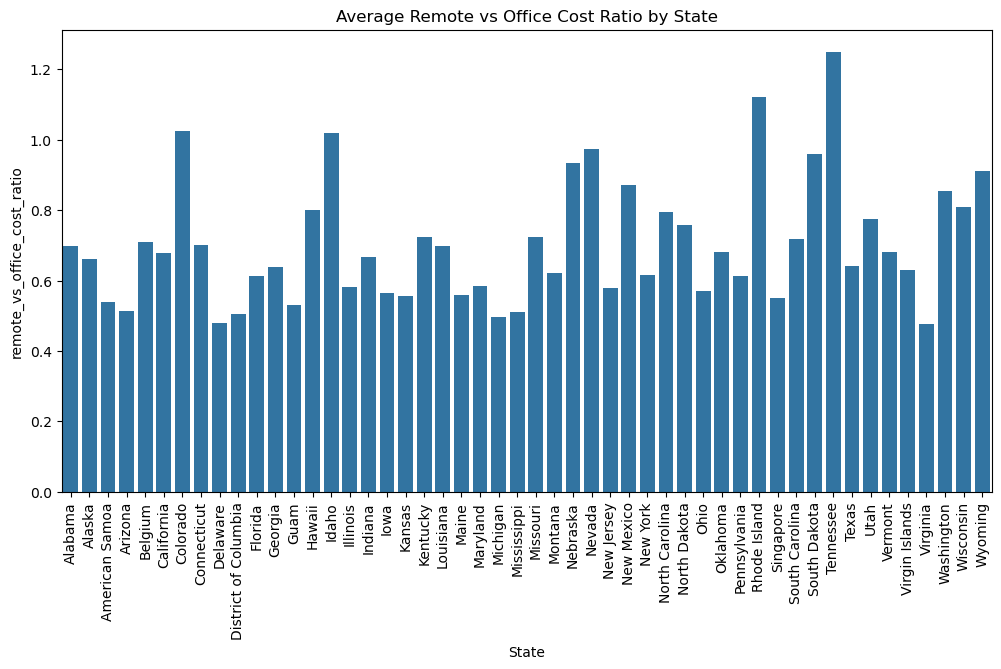

In [78]:
df_grouped = df.groupby("State")["remote_vs_office_cost_ratio"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='State', y='remote_vs_office_cost_ratio', data=df_grouped)
plt.xticks(rotation=90)
plt.title('Average Remote vs Office Cost Ratio by State')
plt.show()


In [82]:
df.shape

(370, 18)